K-Meteoid Clustering Method (PAM)
partition around meteoid


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns

In [58]:
info = {'x':[8,3,4,9,8,5,7,8,7,4],
        'y':[7,7,9,6,5,8,3,4,5,5]
       }

In [59]:
data = pd.DataFrame(info)
data

,x,y
0,8,7
1,3,7
2,4,9
3,9,6
4,8,5
5,5,8
6,7,3
7,8,4
8,7,5
9,4,5


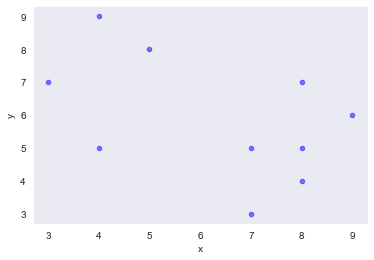

In [61]:
data.plot.scatter(x='x',y='y',alpha=0.5,color = 'blue')
plt.grid()
sns.set_style('darkgrid')



let us select two meteoids

In [62]:

x1 = data['x'][9]
y1 = data['y'][9]
x2 = data['x'][4]
y2 = data['y'][4]


In [51]:
c1 = (x1,y1)
c2 = (x2,y2)

In [52]:
c1

(4, 5)

In [53]:
c2

(8, 5)

In [63]:
def kmedoids_run(X, n_clusters, dist_func, max_iter=1000, tol=0.001):
    # Get initial Medoid
    n_samples, n_features = X.shape
    # Here get_medoid() function Return random objects as initial medoid
    md = get_medoid(n_clusters,n_samples)             
    if verbose:
        print('Initial medoids are ', md)
    medoids = md
    # Here get_cost() function Return Total cost(dj) and cost of each cluster
    members, costs, dj, dist_mat = get_cost(X, md,dist_func)    
    swap = True
    count = 0
    while True:
        swap = False
        for i in range(n_samples):
            if not i in medoids:
                for j in range(len(medoids)):
                    medoids_ = deepcopy(medoids)
                    medoids_[j] = i
                    # Here get_cost() function Return Total cost(di) and cost of each cluster
                    members_, costs_, di, dist_mat_ = get_cost(X, medoids_,dist_func)
                    if di-dj < tol:
                        members, costs, dj, dist_mat = members_, costs_, di, dist_mat_
                        medoids = medoids_
                        swap = True
                        print('Change medoids to ', medoids)
        if count > max_iter:
            print('End Searching by reaching maximum iteration', max_iter)
            break
        if not swap:
            print('End Searching by no swaps')
            break
        count += 1
    return medoids,members, costs, dj, dist_mat
    # Return Final medoids , cost and members of each cluster and Final total cost(dj)


In [66]:
library(cluster) 
library(Rtsne)  
library(ggplot2)
data(iris)
gower_dist = daisy(iris[-5],metric="gower")
summary(gower_dist)
gower_mat = as.matrix(gower_dist)
sil_width = c(NA)
for(i in 2:10)
{
  pam_fit = pam(gower_dist, diss = TRUE, k=i)
  sil_width[i] = pam_fit$silinfo$avg.width
}
plot(1:10,sil_width,xlab="Number of Clusters",ylab="Silhouette width")
lines(1:10, sil_width)
pam_fit = pam(gower_dist, diss=TRUE, k=3)
iris$cluster = pam_fit$clustering
tsne_obj = Rtsne(gower_dist,is_distance = TRUE)
iris_plot = data.frame(tsne_obj$Y)
names(iris_plot) = c("X","Y")
iris_plot$cluster = as.factor(iris$cluster)
ggplot(aes(x=X, y=Y), data=iris_plot) + geom_point(aes(color=cluster))


SyntaxError: invalid syntax (3324856611.py, line 7)